# Computing the predictions

It's time to see how your net performs on unseen `test` data. We will divide the tutorial in 3 parts depending on whether you want to:
* Predict filepaths contained in a [dataset split .txt file](#Predicting-a-datasplit-txt-file)
* Predict [local images](#Predicting-local-files)
* Predict [url images](#Predicting-image-urls)

**Note** Parameters in UPPERCASE letters must be changed by the user if needed.

In [ ]:
import os
import json
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.models import load_model

from planktonclas.data_utils import load_image, load_data_splits, load_class_names
from planktonclas.test_utils import predict
from planktonclas import paths, plot_utils, utils
# 2023-06-05_143422
# User parameters to set
TIMESTAMP = '2023-06-05_143422'                       # timestamp of the model
MODEL_NAME = 'final_model.h5'                           # model to use to make the prediction
TOP_K = 5                                               # number of top classes predictions to save

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load the data
class_names = load_class_names(splits_dir=paths.get_ts_splits_dir())

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)
    
# Load the model
model = load_model(os.path.join(paths.get_checkpoints_dir(), MODEL_NAME), custom_objects=utils.get_custom_objects())

W0627 09:35:48.073305 139899684288320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0627 09:35:48.074146 139899684288320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0627 09:35:48.075000 139899684288320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

Loading class names...


W0627 09:35:53.930311 139899684288320 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


: 

## Predicting a datasplit txt file

Here we are going to compute the predictions and save them into a `.json` file to retireve them later. 

In [ ]:
SPLIT_NAME = 'test_RJB'                                         # data split to use
# conf['general']['images_directory'] = '/media/ignacio/Datos/datasets/semillas/datasets/RJB'  # custom the absolute path to the images directory, if needed

# Load the data
X, y = load_data_splits(splits_dir=paths.get_ts_splits_dir(),
                        im_dir=conf['general']['images_directory'])

Loading train data...


In [8]:
splits_dir=paths.get_ts_splits_dir()

In [10]:
split_name='train'
im_dir=conf['general']['images_directory']
if '{}.txt'.format(split_name) not in os.listdir(splits_dir):
    raise ValueError("Invalid value for the split_name parameter: there is no `{}.txt` file in the `{}` "
                        "directory.".format(split_name, splits_dir))

# Loading splits
print("Loading {} data...".format(split_name))
split = np.genfromtxt(os.path.join(splits_dir, '{}.txt'.format(split_name)), dtype='str', delimiter=' ')
X = np.array([os.path.join(im_dir, i) for i in split[:, 0]])

#TODO Check this part of the code
if len(split.shape) == 2:
    y = split[:, 1].astype(np.int32)
else: # maybe test file has not labels
    y = None


Loading train data...


In [3]:
paths.get_ts_splits_dir()

'/srv/phyto-plankton-classification/models/2023-06-05_143422/dataset_files'

In [10]:
paths.get_predictions_dir()

'/srv/phyto-plankton-classification/models/2023-06-05_143422/predictions'

In [13]:
SPLIT_NAME = 'test_RJB'                                         # data split to use
# conf['general']['images_directory'] = '/media/ignacio/Datos/datasets/semillas/datasets/RJB'  # custom the absolute path to the images directory, if needed

# Load the data
X, y = load_data_splits(splits_dir=paths.get_ts_splits_dir(),
                        im_dir=conf['general']['images_directory'],
                        split_name=SPLIT_NAME)

# Predict
pred_lab, pred_prob = predict(model, X, conf, top_K=TOP_K, filemode='local')

# Save the predictions
pred_dict = {'filenames': list(X),
             'pred_lab': pred_lab.tolist(),
             'pred_prob': pred_prob.tolist()}
if y is not None:
    pred_dict['true_lab'] = y.tolist()

pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}+top{}.json'.format(MODEL_NAME, SPLIT_NAME, TOP_K))
with open(pred_path, 'w') as outfile:
    json.dump(pred_dict, outfile, sort_keys=True)

Loading test_RJB data...
914/914 [==============================] - 38s 42ms/step


## Predicting local files

#### Predict a single local image

1/1 [==============================] - 0s 320ms/step


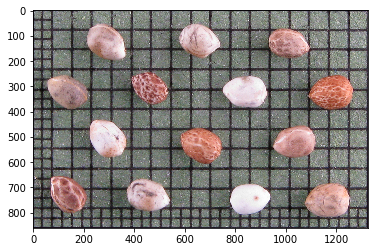

[59.8%] Genus Sambucus
[12.8%] Genus Rubus
[7.3%] Genus Papaver
[6.1%] Genus Polycarpon
[4.4%] Genus Astragalus


In [14]:
FILEPATH = '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Euphorbia_terracina_JC1355_SEM_COL.jpg'

pred_lab, pred_prob = predict(model, FILEPATH, conf, top_K=TOP_K, filemode='local')

plt.imshow(load_image(FILEPATH, filemode='local'))
plt.show()
for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

#### Predict a list of local images

3/3 [==============================] - 0s 144ms/step


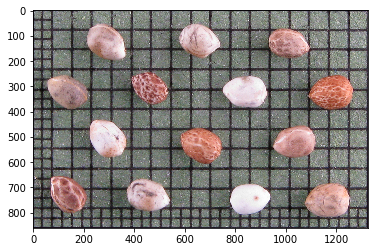

[60.2%] Genus Sambucus
[10.2%] Genus Papaver
[6.3%] Genus Polycarpon
[6.0%] Genus Rubus
[4.9%] Genus Astragalus


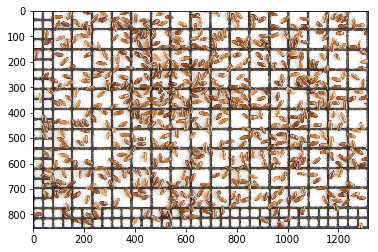

[47.7%] Genus Chelidonium
[18.0%] Genus Zygophyllum
[17.7%] Genus Tribulus
[3.1%] Genus Viburnum
[2.9%] Genus Juniperus


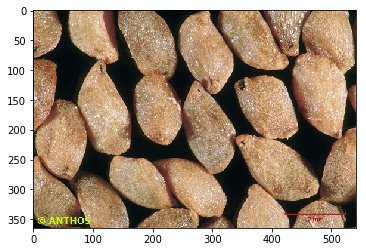

[40.7%] Genus Cardamine
[14.5%] Genus Holcus
[13.5%] Genus Cerastium
[10.9%] Genus Brassica
[2.7%] Genus Hordeum


In [15]:
FILEPATHS = ['/media/ignacio/Datos/datasets/semillas/datasets/RJB/Euphorbia_terracina_JC1355_SEM_COL.jpg',
             '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Campanula_lusitanica_lusitanica_LM4461_SEM_COL.jpg',
             '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Arbutus_unedo_RJB03_1_COL.jpg']
     
pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='local')

for i, im_path in enumerate(FILEPATHS):
    plt.figure(i)
    plt.imshow(load_image(im_path, filemode='local'))
    plt.show()
    for j in range(pred_lab.shape[1]):
        print('[{:.1f}%] {}'.format(pred_prob[i, j] * 100, class_names[pred_lab[i, j]]))

#### Predict a list of local images belonging to the same observation

In this case all the images belong to the same observation so we wan to average the predictions among all of them.

In [16]:
FILEPATHS = ['/media/ignacio/Datos/datasets/semillas/datasets/RJB/Euphorbia_terracina_JC1355_SEM_COL.jpg',
             '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Campanula_lusitanica_lusitanica_LM4461_SEM_COL.jpg',
             '/media/ignacio/Datos/datasets/semillas/datasets/RJB/Arbutus_unedo_RJB03_1_COL.jpg']
     
pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='local', merge=True)

for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

3/3 [==============================] - 0s 141ms/step
[17.0%] Genus Sambucus
[14.6%] Genus Chelidonium
[13.8%] Genus Cardamine
[8.9%] Genus Zygophyllum
[6.2%] Genus Papaver


## Predicting image urls

#### Predict a single url

1/1 [==============================] - 1s 967ms/step


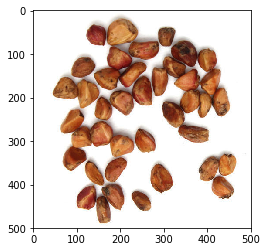

[47.5%] Genus Medicago
[19.5%] Genus Prunus
[14.6%] Genus Onobrychis
[7.5%] Genus Geranium
[3.2%] Genus Abutilon


In [17]:
FILEPATH = 'https://4.imimg.com/data4/PC/DF/MY-15664163/rose-flower-seed-500x500.jpg'

pred_lab, pred_prob = predict(model, FILEPATH, conf, top_K=TOP_K, filemode='url')

plt.imshow(load_image(FILEPATH, filemode='url'))
plt.show()
for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

#### Predict a list of urls

2/2 [==============================] - 1s 261ms/step


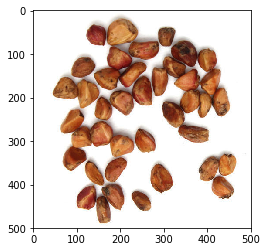

[49.8%] Genus Medicago
[16.0%] Genus Prunus
[13.4%] Genus Onobrychis
[7.3%] Genus Geranium
[3.4%] Genus Cerastium


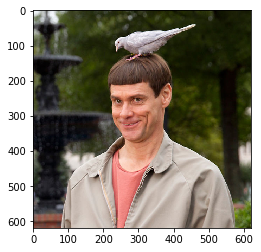

[21.4%] Genus Crupina
[9.2%] Genus Silybum
[7.4%] Genus Ailanthus
[7.2%] Genus Cnicus
[6.2%] Genus Carthamus


In [18]:
FILEPATHS = ['https://4.imimg.com/data4/PC/DF/MY-15664163/rose-flower-seed-500x500.jpg',
             'https://m.media-amazon.com/images/M/MV5BMTkyODFhNjctY2RiNi00ZGRmLWJhOTktNjM5OGQ2YTFiOWU2L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNTc3MjUzNTI@._V1_.jpg']

pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='url')

for i, im_path in enumerate(FILEPATHS):
    plt.figure(i)
    plt.imshow(load_image(im_path, filemode='url'))
    plt.show()
    for j in range(pred_lab.shape[1]):
        print('[{:.1f}%] {}'.format(pred_prob[i, j] * 100, class_names[pred_lab[i, j]]))

#### Predict a list of local images belonging to the same observation

In this case all the images belong to the same observation so we wan to average the predictions among all of them.

In [19]:
FILEPATHS = ['https://4.imimg.com/data4/PC/DF/MY-15664163/rose-flower-seed-500x500.jpg',
             'https://m.media-amazon.com/images/M/MV5BMTkyODFhNjctY2RiNi00ZGRmLWJhOTktNjM5OGQ2YTFiOWU2L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNTc3MjUzNTI@._V1_.jpg']

pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='url', merge=True)

for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

2/2 [==============================] - 0s 218ms/step
[24.9%] Genus Medicago
[12.8%] Genus Onobrychis
[12.4%] Genus Crupina
[8.0%] Genus Silybum
[7.8%] Genus Ailanthus


In [ ]:
# os.chdir("/srv/image_classification_tf")
# import os
# current_dir = os.getcwd()
# current_dir
# import os
# current_dir = os.getcwd()

# # Specify the folder name
# folder_name = "phyto-plankton-classification"

# # Construct the folder path
# folder_path = os.path.join(current_dir, folder_name)
# os.chdir(folder_path)
# print("Folder path:", folder_path)
# folder_path=current_dir
# print("Folder path:", folder_path)
# files = os.listdir(folder_path)
# print(files)